### Projet de fin de cours (Introduction au Machine Learning) 
### Master 1 - Statistiques et Informatique Décisionnelle 
### Université Alioune DIOP de Bambey 
### Année Universitaire 2017 / 2018
### Dalyo Sid Ousmane OURBA (ourbasid@gmail.com | +221 772822236 | +226 75642055)

# Conception d’un modèle de régression linéaire pour la prédiction de prix de logements. 

# Étape 1: Acquérir les données et créer votre environnement

## Importation des library essentielle a l'importation de la base de donnée#

In [4]:
import pandas as pd 
import numpy as np 

## importation des données de l'étude

In [6]:
train = pd.read_csv('C:/Users/Sid Ousmane/Documents/texte/MASTER_SID_UADB/M1SID/Semestre 2/Machine learning/Projet/train.csv') 
test = pd.read_csv('C:/Users/Sid Ousmane/Documents/texte/MASTER_SID_UADB/M1SID/Semestre 2/Machine learning/Projet/test.csv')

## Taille des fichier importer

In [9]:
print ("Taille des données d'entraînement:", train.shape) 
print ("Taille des données de test:", test.shape)

Taille des données d'entraînement: (1460, 81)
Taille des données de test: (1459, 80)


## Affichage des 5 premières lignes de la base de donnée

In [13]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Importation de matplotlib pour la visualisation des données

In [104]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot') 
plt.rcParams['figure.figsize'] = (10, 6)

# Étape 2: Exploration des données et création de des features 

In [19]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [99]:
# Le prix de vente moyen d'une maison dans notre ensemble de données est proche de 180 000 USD,
# la plupart des valeurs se situant dans une plage allant de 130 000 USD à 215 000 USD

## calcule du Coefficient d'asymétrie et visualisation de l'histogramme de SalePrice

Skew: 1.8902547272110803


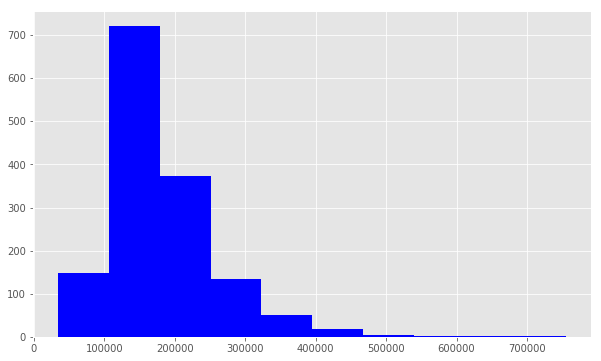

In [105]:
print ("Skew:", train.SalePrice.skew()) 
plt.hist(train.SalePrice, color='blue') 
plt.show()

In [101]:
# On peut noter que la distribution a une queue plus longue sur la droite.Elle est donc etalé a droite. La distribution est positivement asymétrique

## Transformation logarithmique de train.SalePric, recalcule du coefficient d'asymétrie et visualisation des données

Skew: 0.12174203145727748


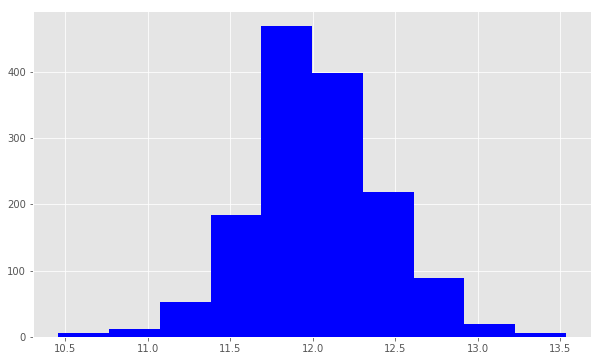

In [107]:
target = np.log(train.SalePrice) 
print("Skew:", target.skew()) 
plt.hist(target, color='blue')
plt.show()

In [ ]:
# Les données logarithmées ont semble avoir une distribution normale. 

# Travaillons avec les colonnes numériques

In [28]:
numeric_features = train.select_dtypes(include=[np.number]) 
numeric_features.dtypes 

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## Calcule des corrélations entre SalePrice et les autres variables

In [30]:
corr = numeric_features.corr() 

In [34]:
#Affichage des 5 caractéristiques sont les plus corrélées positivements et des
#5 caractéristiques les plus corrélées négativement

In [33]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n') 
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


## Utilisation de la fonction OverallQual pour extraire que les valeurs entières comprises entre 1 et 10 inclus

In [36]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

## création d'un tableau croisé dynamique pour approfondir la relation entre OverallQual et SalePrice

In [39]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median) 
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


## Visualisation du tableau dynamique a l'aide d'un graphique en bar

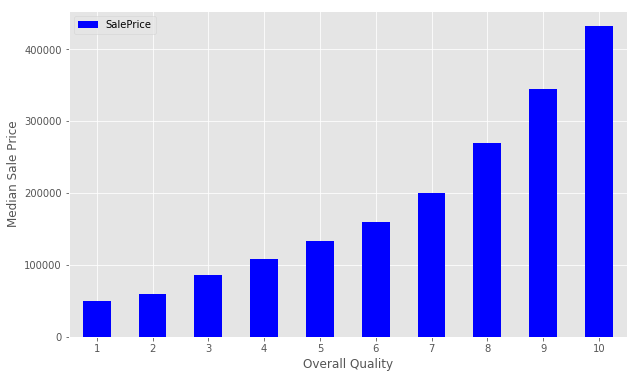

In [43]:
quality_pivot.plot(kind='bar', color='blue') 
plt.xlabel('Overall Quality') 
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [108]:
# On remarque que le prix de vente médian augmente strictement avec la qualité globale

## Diagramme de dispersion entre Ground Living Area GrLivArea et SalePrice

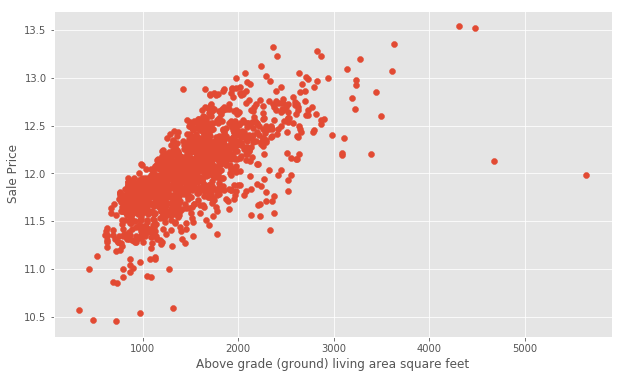

In [45]:
plt.scatter(x=train['GrLivArea'], y=target) 
plt.ylabel('Sale Price') 
plt.xlabel('Above grade (ground) living area square feet') 
plt.show() 

In [110]:
## Nous remarquons que l’augmentation de la surface habitable correspond à l’augmentation du prix. 

# Diagramme de dispersion entre Garage Area et SalePrice

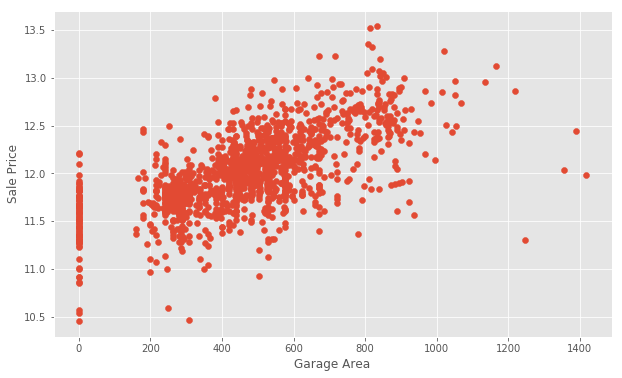

In [47]:
plt.scatter(x=train['GarageArea'], y=target) 
plt.ylabel('Sale Price') 
plt.xlabel('Garage Area') 
plt.show() 

In [111]:
# On remarque qu'il y a beaucoup de maisons avec 0 pour la zone de garage, ce qui indique qu'elles n'ont 
# pas de garage. Nous transformerons d’autres fonctionnalités ultérieurement pour refléter cette 
# hypothèse. Il y a aussi quelques valeurs aberrantes. Les valeurs aberrantes peuvent affecter notre 
# modèle de régression en éloignant notre ligne de régression estimée de la ligne de régression réelle.
# Nous allons donc devoirs les supprimer.

## Suppression de certains valeurs abérentes et création d'un nouveau dataframe

In [50]:
train = train[train['GarageArea'] < 1200]

## Visualisation de la nouvelle base de donnée ainsi crée

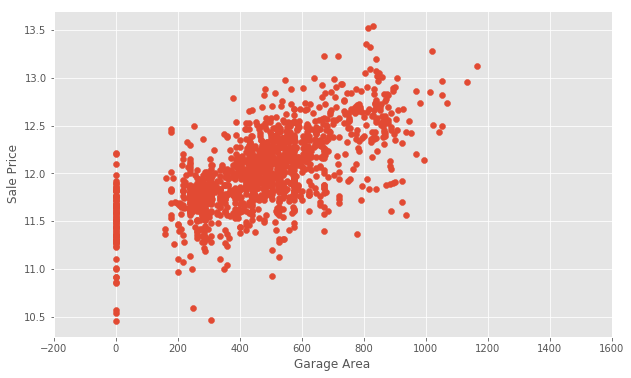

In [52]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice)) 
plt.xlim(-200,1600) # This forces the same scale as before 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area') 
plt.show()

# Gestion des valeurs nulles

## Cacul et affichage des valeurs nulles dans chaque variables

In [54]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25]) 
nulls.columns = ['Null Count'] 
nulls.index.name = 'Feature' 
nulls 

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


## liste des valeurs uniquent de MiscFeature

In [57]:
print (train.MiscFeature.unique()) 

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


# Debattre des caractérisque

## Séléction des caractéristiques non numériques

In [60]:
categoricals = train.select_dtypes(exclude=[np.number]) 
categoricals.describe() 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


# Transformation et feature engineering

## comptons les données de rue, qui indiquent s'il existe un accès de gravier ou de route pavée à la propriété. 

In [61]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



## Création de la nouvelle colonne appelée enc_street

In [62]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True) 
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True) 
print ('Encoded: \n') 
print (train.enc_street.value_counts()) 

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


## Tableau croisé dynamique entre SaleCondition et SalePrice, visualisation

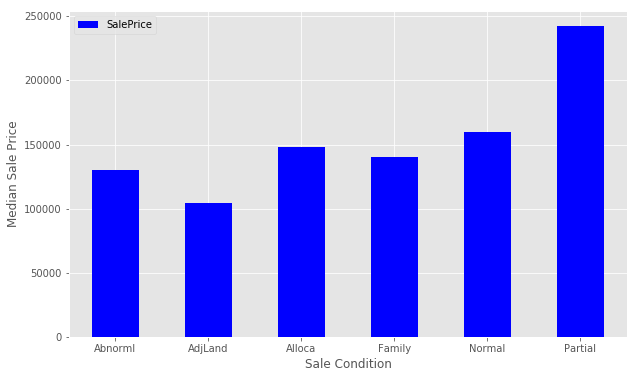

In [64]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue') 
plt.xlabel('Sale Condition') 
plt.ylabel('Median Sale Price') 
plt.xticks(rotation=0) 
plt.show() 

In [112]:
# On remarque que Partial a un prix de vente médian nettement plus élevé que les autres

## Rencodage de la variable SaleCondion en transformation la modalité Patrial en 1 et les autres en 0

In [67]:
def encode(x): return 1 if x == 'Partial' else 0 
train['enc_condition'] = train.SaleCondition.apply(encode) 
test['enc_condition'] = test.SaleCondition.apply(encode)

## Recréons un tableaux croisé dynamique avec la nouvelle variables ainsi crée et visualisation

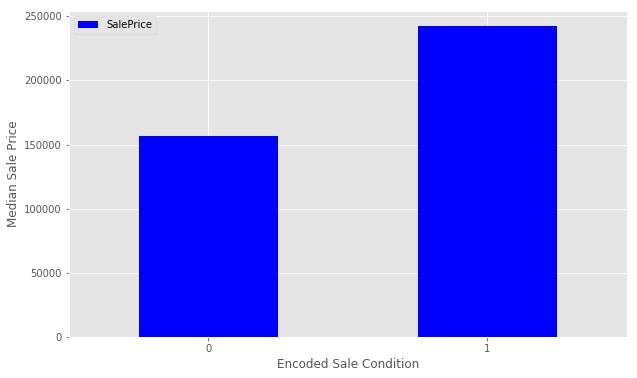

In [69]:
condition_pivot = train.pivot_table( 
index='enc_condition',  
values='SalePrice',  
aggfunc=np.median 
) 
condition_pivot.plot(kind='bar', color='blue') 
plt.xlabel('Encoded Sale Condition') 
plt.ylabel('Median Sale Price') 
plt.xticks(rotation=0) 
plt.show() 

## Traitement des données manquantes en les remplaçant pour la moyenne

In [70]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

## Vérification de la réussite du traitement des données manquantes

In [71]:
sum(data.isnull().sum() != 0)

0

# Étape 3: Construction d'un modèle linéaire

## séparation des entités et la variable cible pour la modélisation

In [73]:
y = np.log(train.SalePrice) 
X = data.drop(['SalePrice', 'Id'], axis=1)

## Partitionnement des données pour la modélisations

In [74]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33) 

# Modélisation

## Creation et instancions d'un modèle de regression linéaire

In [75]:
from sklearn import linear_model 
lr = linear_model.LinearRegression()

## adaptation des données au modèle modèle

In [77]:
model = lr.fit(X_train, y_train)

# Évaluation de la performance et visualisation des résultats

## Valeur R² du modèle

In [80]:
print ("R^2: \n", model.score(X_test, y_test))

R^2: 
 0.888247770926258


In [ ]:
# On remarque qu'environ 89% de la variance de notre variable cible est expliquée nos caractéristiques 

## Prediction avec les données construites: x_train

In [83]:
predictions = model.predict(X_test)

## Calcule de la valeur RMSE

In [84]:
from sklearn.metrics import mean_squared_error 

In [85]:
print ('Le RMSE est: \n', mean_squared_error(y_test, predictions)) 

Le RMSE est: 
 0.017841794519567168


In [113]:
# Le RMSE mesure la distance entre nos valeurs prédites et les valeurs réelles.

## Nuage de point entre nous valeurs predictes et les valeurs réelles

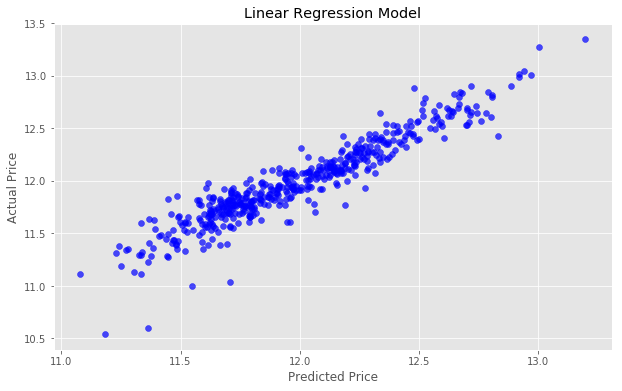

In [87]:
actual_values = y_test 
plt.scatter(predictions, actual_values,alpha=.7, color='b') #alpha helps to show overlapping data 
plt.xlabel('Predicted Price') 
plt.ylabel('Actual Price') 
plt.title('Linear Regression Model') 
plt.show() 

# Essayons d'améliorer le modèle

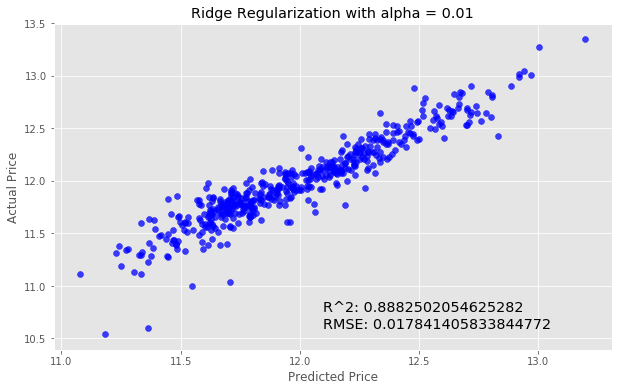

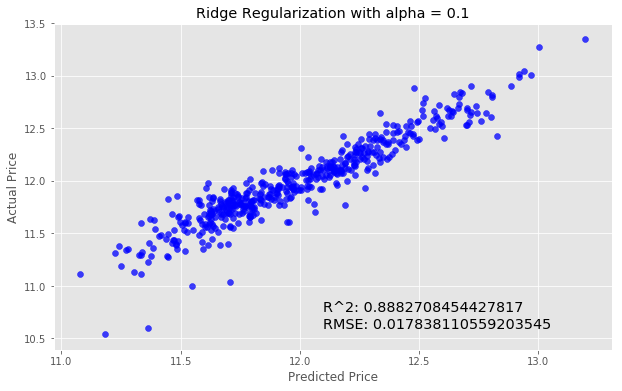

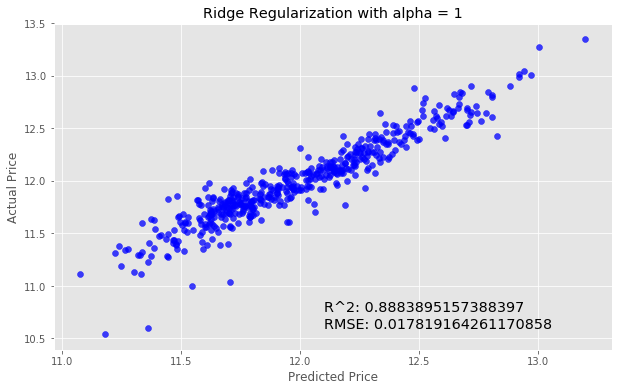

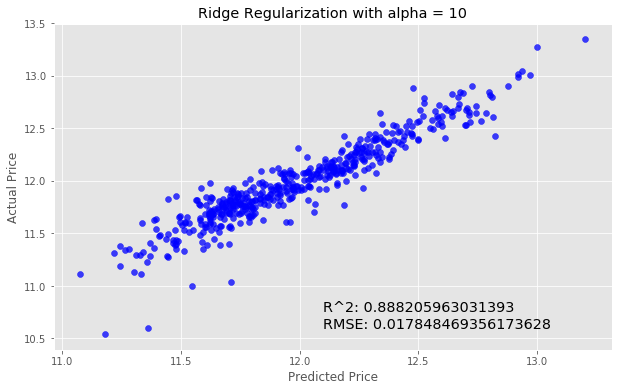

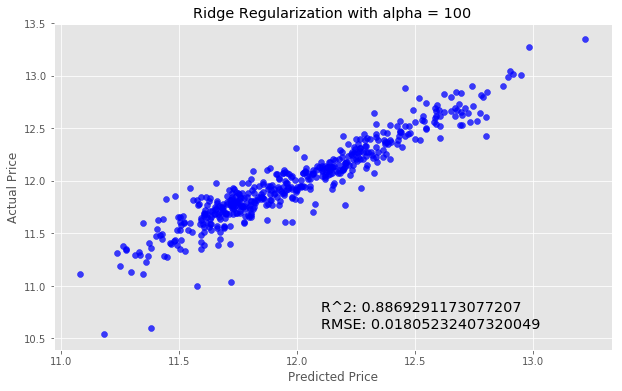

In [91]:
for i in range (-2, 3): 
    alpha = 10**i 
    rm = linear_model.Ridge(alpha=alpha) 
    ridge_model = rm.fit(X_train, y_train) 
    preds_ridge = ridge_model.predict(X_test) 
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b') 
    plt.xlabel('Predicted Price') 
    plt.ylabel('Actual Price') 
    plt.title('Ridge Regularization with alpha = {}'.format(alpha)) 
    overlay = 'R^2: {}\nRMSE: {}'.format( 
    ridge_model.score(X_test, y_test), 
    mean_squared_error(y_test, preds_ridge)) 
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large') 
    plt.show() 